In [1]:
### 加载全部特征合并表
import pandas as pd

full_data = pd.read_csv('./tmp/全部特征合并表_融合.csv')

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   文本编号                    300 non-null    object 
 1   单词数量-DESWC-03           297 non-null    float64
 2   句子数量-DESSC-02           297 non-null    float64
 3   年级                      300 non-null    int64  
 4   多样性-LDVOCDa（51）         252 non-null    float64
 5   密度-WRDFRQC（94）          252 non-null    float64
 6   复杂度-K                   252 non-null    float64
 7   句子长度-DESSL（06）          267 non-null    float64
 8   短语长度-PhraseLength       267 non-null    float64
 9   短语密度-PhraseDensity      267 non-null    float64
 10  句子结构-SentenceStructure  267 non-null    float64
 11  句法相似-SYNSTRUT           267 non-null    float64
 12  局部连贯-LocalCoherence     259 non-null    float64
 13  整体连贯-GlobalCoherence    259 non-null    float64
 14  因果衔接-SMCAUSr-64         278 non-null    fl

In [2]:
#删除段落平均长度标准差-DESPLd-05这个特征列
full_data.drop(columns=['段落平均长度标准差-DESPLd-05'], inplace=True)

In [3]:
#将各个属性列的空值用该列的均值填充
for col in full_data.columns:
    if full_data[col].isnull().sum() > 0:
        full_data[col].fillna(full_data[col].mean(), inplace=True)

/var/folders/c3/wsb8b2lj0_73blm47r0wt1p80000gn/T/ipykernel_49801/771110511.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data[col].fillna(full_data[col].mean(), inplace=True)


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   文本编号                    300 non-null    object 
 1   单词数量-DESWC-03           300 non-null    float64
 2   句子数量-DESSC-02           300 non-null    float64
 3   年级                      300 non-null    int64  
 4   多样性-LDVOCDa（51）         300 non-null    float64
 5   密度-WRDFRQC（94）          300 non-null    float64
 6   复杂度-K                   300 non-null    float64
 7   句子长度-DESSL（06）          300 non-null    float64
 8   短语长度-PhraseLength       300 non-null    float64
 9   短语密度-PhraseDensity      300 non-null    float64
 10  句子结构-SentenceStructure  300 non-null    float64
 11  句法相似-SYNSTRUT           300 non-null    float64
 12  局部连贯-LocalCoherence     300 non-null    float64
 13  整体连贯-GlobalCoherence    300 non-null    float64
 14  因果衔接-SMCAUSr-64         300 non-null    fl

In [5]:
from scipy.stats import shapiro
import numpy as np

def normality_test_by_columns(df, columns):
    """
    对指定DataFrame的指定属性列，按年级分组进行Shapiro-Wilk正态性检验。
    参数:
        df: DataFrame，必须包含'年级'列
        columns: list，要检验的属性列名列表
    返回:
        normality_results: dict，存储每个属性每个年级的检验结果
    """
    print("=== 正态性检验 (Shapiro-Wilk检验) ===")
    normality_results = {}

    if '年级' not in df.columns:
        print("数据中不包含'年级'列，无法进行分组正态性检验。")
        return normality_results

    for col in columns:
        if col not in df.columns:
            print(f"\n变量: {col} 不在数据中，跳过。")
            continue

        print(f"\n变量: {col}")
        normality_results[col] = {}

        for grade in sorted(df['年级'].dropna().unique()):
            data = df[df['年级'] == grade][col].dropna()
            if len(data) >= 3:
                stat, p_value = shapiro(data)
                print(f"  {int(grade)}年级: W={stat:.4f}, p={p_value:.4f}")
                if p_value < 0.05:
                    print(f"    → 拒绝正态性假设 (p < 0.05)")
                else:
                    print(f"    → 接受正态性假设 (p ≥ 0.05)")
                normality_results[col][f"{int(grade)}年级"] = {
                    'statistic': stat,
                    'p_value': p_value,
                    'is_normal': p_value >= 0.05,
                    'sample_size': len(data)
                }
            else:
                print(f"  {int(grade)}年级: 样本量不足 ({len(data)} < 3)")

    return normality_results

# 示例调用
cols = full_data.columns.to_list()
cols.remove('文本编号')
cols.remove('年级')
columns_to_test = cols  # 替换为你要检验的列名
normality_results = normality_test_by_columns(full_data, columns_to_test)

=== 正态性检验 (Shapiro-Wilk检验) ===

变量: 单词数量-DESWC-03
  1年级: W=0.9717, p=0.0300
    → 拒绝正态性假设 (p < 0.05)
  2年级: W=0.9618, p=0.0054
    → 拒绝正态性假设 (p < 0.05)
  3年级: W=0.9777, p=0.0879
    → 接受正态性假设 (p ≥ 0.05)

变量: 句子数量-DESSC-02
  1年级: W=0.9725, p=0.0345
    → 拒绝正态性假设 (p < 0.05)
  2年级: W=0.9659, p=0.0108
    → 拒绝正态性假设 (p < 0.05)
  3年级: W=0.9648, p=0.0089
    → 拒绝正态性假设 (p < 0.05)

变量: 多样性-LDVOCDa（51）
  1年级: W=0.9677, p=0.0148
    → 拒绝正态性假设 (p < 0.05)
  2年级: W=0.9766, p=0.0726
    → 接受正态性假设 (p ≥ 0.05)
  3年级: W=0.9796, p=0.1231
    → 接受正态性假设 (p ≥ 0.05)

变量: 密度-WRDFRQC（94）
  1年级: W=0.9811, p=0.1604
    → 接受正态性假设 (p ≥ 0.05)
  2年级: W=0.9735, p=0.0411
    → 拒绝正态性假设 (p < 0.05)
  3年级: W=0.9734, p=0.0405
    → 拒绝正态性假设 (p < 0.05)

变量: 复杂度-K
  1年级: W=0.9892, p=0.5993
    → 接受正态性假设 (p ≥ 0.05)
  2年级: W=0.9566, p=0.0023
    → 拒绝正态性假设 (p < 0.05)
  3年级: W=0.9622, p=0.0058
    → 拒绝正态性假设 (p < 0.05)

变量: 句子长度-DESSL（06）
  1年级: W=0.9510, p=0.0010
    → 拒绝正态性假设 (p < 0.05)
  2年级: W=0.9879, p=0.4987
    → 接受正态性假设 (p 

In [6]:
# 7. 单因素方差分析 (ANOVA) - 修正版
from scipy.stats import shapiro, levene, f_oneway, tukey_hsd
import warnings
warnings.filterwarnings('ignore')

def one_way_anova_improved(df):
    """单因素方差分析 (修正版) - 传入单个DataFrame"""
    print("=== 单因素方差分析 (ANOVA) ===")
    
    anova_results = {}
    
    if '年级' not in df.columns:
        print("数据中不包含'年级'列，无法进行ANOVA分析。")
        return anova_results
        
    print(f"\nANOVA分析结果:")
    
    # 识别数值列（排除年级列）
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != '年级']
    
    if len(numeric_cols) > 0:
        for col in numeric_cols[:19]:  # 只分析前19个数值列
            print(f"\n变量: {col}")
            
            # 准备数据
            groups = []
            labels = []
            
            for grade in sorted(df['年级'].dropna().unique()):
                data = df[df['年级'] == grade][col].dropna()
                if len(data) >= 2:
                    groups.append(data)
                    labels.append(f"{int(grade)}年级")
            
            if len(groups) >= 2:
                # 执行ANOVA
                f_stat, p_value = f_oneway(*groups)
                
                # 计算效应量 (η²)
                all_data = np.concatenate(groups)
                total_mean = np.mean(all_data)
                
                total_ss = sum([(x - total_mean)**2 for x in all_data])
                between_ss = sum([len(g) * (np.mean(g) - total_mean)**2 for g in groups])
                eta_squared = between_ss / total_ss if total_ss > 0 else 0
                
                print(f"  F统计量: {f_stat:.4f}")
                print(f"  p值: {p_value:.4f}")
                print(f"  效应量 (η²): {eta_squared:.4f}")
                
                # 解释效应量
                if eta_squared < 0.01:
                    effect_size = "小效应"
                elif eta_squared < 0.06:
                    effect_size = "中等效应"
                else:
                    effect_size = "大效应"
                
                print(f"  效应大小: {effect_size}")
                
                if p_value < 0.001:
                    sig_level = "p < 0.001"
                elif p_value < 0.01:
                    sig_level = "p < 0.01"
                elif p_value < 0.05:
                    sig_level = "p < 0.05"
                else:
                    sig_level = "p ≥ 0.05"
                
                print(f"  显著性: {sig_level}")
                
                if p_value < 0.05:
                    print(f"  → 存在显著的年级间差异")
                else:
                    print(f"  → 无显著的年级间差异")
                
                # 显示各年级均值
                print(f"  各年级均值:")
                for i, (group, label) in enumerate(zip(groups, labels)):
                    print(f"    {label}: {np.mean(group):.4f} (n={len(group)})")
                
                anova_results[col] = {
                    'f_statistic': f_stat,
                    'p_value': p_value,
                    'eta_squared': eta_squared,
                    'effect_size': effect_size,
                    'is_significant': p_value < 0.05,
                    'group_means': {label: np.mean(group) for group, label in zip(groups, labels)},
                    'group_sizes': {label: len(group) for group, label in zip(groups, labels)}
                }
            else:
                print("  数据不足，无法进行分析")
    else:
        print("未找到合适的数值列进行分析")
    
    return anova_results

# 执行ANOVA分析
anova_results = one_way_anova_improved(full_data)

=== 单因素方差分析 (ANOVA) ===

ANOVA分析结果:

变量: 单词数量-DESWC-03
  F统计量: 25.1115
  p值: 0.0000
  效应量 (η²): 0.1446
  效应大小: 大效应
  显著性: p < 0.001
  → 存在显著的年级间差异
  各年级均值:
    1年级: 197.5373 (n=100)
    2年级: 181.8600 (n=100)
    3年级: 216.3300 (n=100)

变量: 句子数量-DESSC-02
  F统计量: 5.0335
  p值: 0.0071
  效应量 (η²): 0.0328
  效应大小: 中等效应
  显著性: p < 0.01
  → 存在显著的年级间差异
  各年级均值:
    1年级: 14.6584 (n=100)
    2年级: 13.3900 (n=100)
    3年级: 13.7900 (n=100)

变量: 多样性-LDVOCDa（51）
  F统计量: 2.2510
  p值: 0.1071
  效应量 (η²): 0.0149
  效应大小: 中等效应
  显著性: p ≥ 0.05
  → 无显著的年级间差异
  各年级均值:
    1年级: 86.1376 (n=100)
    2年级: 83.2685 (n=100)
    3年级: 86.9415 (n=100)

变量: 密度-WRDFRQC（94）
  F统计量: 27.9469
  p值: 0.0000
  效应量 (η²): 0.1584
  效应大小: 大效应
  显著性: p < 0.001
  → 存在显著的年级间差异
  各年级均值:
    1年级: 2.3320 (n=100)
    2年级: 2.2634 (n=100)
    3年级: 2.2152 (n=100)

变量: 复杂度-K
  F统计量: 28.4671
  p值: 0.0000
  效应量 (η²): 0.1609
  效应大小: 大效应
  显著性: p < 0.001
  → 存在显著的年级间差异
  各年级均值:
    1年级: 1.7862 (n=100)
    2年级: -0.0911 (n=100)
    3年级: -1.6951 (n=100

In [7]:
# 8. 事后检验 (Tukey HSD) - 修正版
def post_hoc_test_improved(df, anova_results):
    """
    事后检验 (Tukey HSD) - 修正版，参数为单个DataFrame
    anova_results 应为 {列名: {f_statistic, p_value, ...}} 的结构
    """
    print("=== 事后检验 (Tukey HSD) ===")
    
    post_hoc_results = {}
    
    if '年级' not in df.columns:
        print("数据中不包含'年级'列，无法进行事后检验")
        return post_hoc_results

    print("\n数据表 事后检验结果:")

    # 只对有显著差异的变量进行事后检验
    for col, result in anova_results.items():
        if result['is_significant']:
            print(f"\n变量: {col} (ANOVA显著，进行事后检验)")
            
            # 准备数据
            groups = []
            labels = []
            
            for grade in sorted(df['年级'].unique()):
                data = df[df['年级'] == grade][col].dropna()
                if len(data) >= 2:
                    groups.append(data)
                    labels.append(f"{int(grade)}年级")
            
            if len(groups) >= 2:
                # 执行Tukey HSD检验
                tukey_result = tukey_hsd(*groups)
                
                print("  两两比较结果:")
                for i in range(len(labels)):
                    for j in range(i+1, len(labels)):
                        diff = tukey_result.statistic[i, j]
                        p_val = tukey_result.pvalue[i, j]
                        conf_low = tukey_result.confidence_interval(confidence_level=0.95).low
                        conf_high = tukey_result.confidence_interval(confidence_level=0.95).high
                        
                        print(f"    {labels[i]} vs {labels[j]}:")
                        print(f"      差异: {diff:.4f}")
                        print(f"      p值: {p_val:.4f}")
                        print(f"      95%置信区间: [{conf_low}, {conf_high}]")
                        
                        if p_val < 0.05:
                            print(f"      → 显著差异")
                        else:
                            print(f"      → 无显著差异")
                
                post_hoc_results[f"{col}"] = {
                    'tukey_result': tukey_result,
                    'labels': labels
                }
            else:
                print("  数据不足，无法进行事后检验")
        else:
            print(f"\n变量: {col} (ANOVA不显著，跳过事后检验)")
    
    return post_hoc_results

# 示例：对单个DataFrame进行事后检验

post_hoc_results = post_hoc_test_improved(full_data, anova_results)

=== 事后检验 (Tukey HSD) ===

数据表 事后检验结果:

变量: 单词数量-DESWC-03 (ANOVA显著，进行事后检验)
  两两比较结果:
    1年级 vs 2年级:
      差异: 15.6773
      p值: 0.0041
      95%置信区间: [[[-11.47276989   4.20450283 -30.26549717]
 [-27.15004262 -11.47276989 -45.94276989]
 [  7.31995738  22.99723011 -11.47276989]], [[ 11.47276989  27.15004262  -7.31995738]
 [ -4.20450283  11.47276989 -22.99723011]
 [ 30.26549717  45.94276989  11.47276989]]]
      → 显著差异
    1年级 vs 3年级:
      差异: -18.7927
      p值: 0.0004
      95%置信区间: [[[-11.47276989   4.20450283 -30.26549717]
 [-27.15004262 -11.47276989 -45.94276989]
 [  7.31995738  22.99723011 -11.47276989]], [[ 11.47276989  27.15004262  -7.31995738]
 [ -4.20450283  11.47276989 -22.99723011]
 [ 30.26549717  45.94276989  11.47276989]]]
      → 显著差异
    2年级 vs 3年级:
      差异: -34.4700
      p值: 0.0000
      95%置信区间: [[[-11.47276989   4.20450283 -30.26549717]
 [-27.15004262 -11.47276989 -45.94276989]
 [  7.31995738  22.99723011 -11.47276989]], [[ 11.47276989  27.15004262  -7.31995738]
 [ -4

=== 分析结果汇总 ===

方差分析结果汇总表:
                        维度     F统计量      p值  效应量(η²)  效应大小  显著性
0            单词数量-DESWC-03  25.1115  0.0000   0.1446   大效应   显著
1            句子数量-DESSC-02   5.0335  0.0071   0.0328  中等效应   显著
2          多样性-LDVOCDa（51）   2.2510  0.1071   0.0149  中等效应  不显著
3           密度-WRDFRQC（94）  27.9469  0.0000   0.1584   大效应   显著
4                    复杂度-K  28.4671  0.0000   0.1609   大效应   显著
5           句子长度-DESSL（06）  17.8593  0.0000   0.1074   大效应   显著
6        短语长度-PhraseLength  16.0271  0.0000   0.0974   大效应   显著
7       短语密度-PhraseDensity   1.3173  0.2694   0.0088   小效应  不显著
8   句子结构-SentenceStructure   1.8761  0.1550   0.0125  中等效应  不显著
9            句法相似-SYNSTRUT   6.3227  0.0020   0.0408  中等效应   显著
10     局部连贯-LocalCoherence   0.5367  0.5853   0.0036   小效应  不显著
11    整体连贯-GlobalCoherence   3.7953  0.0236   0.0249  中等效应   显著
12         因果衔接-SMCAUSr-64   6.1934  0.0023   0.0400  中等效应   显著
13         意图衔接-SMINTEr-65   2.6216  0.0744   0.0173  中等效应  不显著
14          时

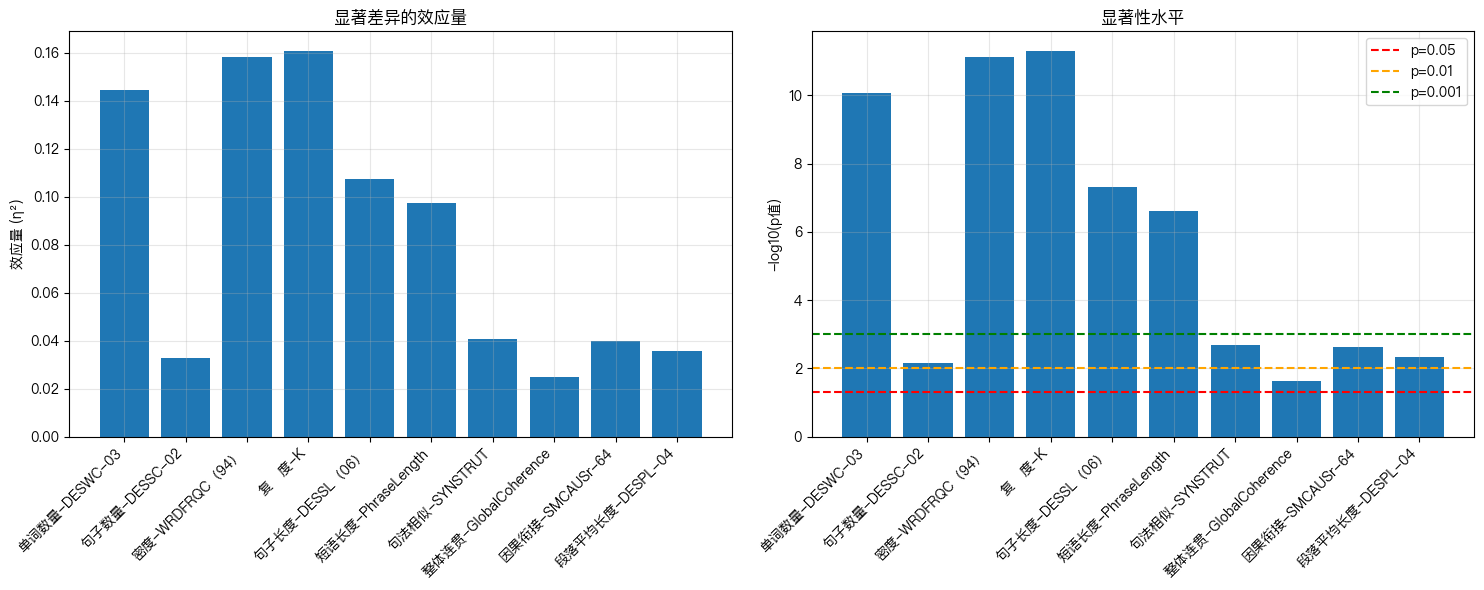


发现 10 个显著差异的变量


In [8]:
# 9. 结果汇总与可视化 (修正版)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = ['PingFang HK']
plt.rcParams['axes.unicode_minus'] = False 

def summarize_results_improved(anova_results, post_hoc_results):
    """
    结果汇总与可视化 (修正版)
    anova_results: dict，形如 {变量名: {f_statistic, p_value, eta_squared, effect_size, is_significant, ...}}
    post_hoc_results: dict，形如 {变量名: {'tukey_result': ..., 'labels': [...]}}
    """
    print("=== 分析结果汇总 ===")
    
    # 创建结果汇总表
    summary_data = []
    # anova_results 是 dict，key为变量名，value为结果dict
    for col, result in anova_results.items():
        summary_data.append({
            '维度': col,
            'F统计量': result['f_statistic'],
            'p值': result['p_value'],
            '效应量(η²)': result['eta_squared'],
            '效应大小': result['effect_size'],
            '显著性': '显著' if result['is_significant'] else '不显著'
        })
    
    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print("\n方差分析结果汇总表:")
        print(summary_df.round(4))
        
        # 可视化显著结果
        significant_results = summary_df[summary_df['显著性'] == '显著']
        
        if len(significant_results) > 0:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # 效应量可视化
            ax1.bar(range(len(significant_results)), significant_results['效应量(η²)'])
            ax1.set_xticks(range(len(significant_results)))
            ax1.set_xticklabels(significant_results['维度'], rotation=45, ha='right')
            ax1.set_ylabel('效应量 (η²)')
            ax1.set_title('显著差异的效应量')
            ax1.grid(True, alpha=0.3)
            
            # p值可视化
            ax2.bar(range(len(significant_results)), -np.log10(significant_results['p值']))
            ax2.set_xticks(range(len(significant_results)))
            ax2.set_xticklabels(significant_results['维度'], rotation=45, ha='right')
            ax2.set_ylabel('-log10(p值)')
            ax2.set_title('显著性水平')
            ax2.axhline(y=-np.log10(0.05), color='red', linestyle='--', label='p=0.05')
            ax2.axhline(y=-np.log10(0.01), color='orange', linestyle='--', label='p=0.01')
            ax2.axhline(y=-np.log10(0.001), color='green', linestyle='--', label='p=0.001')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
            print(f"\n发现 {len(significant_results)} 个显著差异的变量")
        else:
            print("\n未发现显著差异的变量")
    else:
        print("\n没有可用的分析结果")
        summary_df = pd.DataFrame()
    
    return summary_df

# 汇总结果
summary_df = summarize_results_improved(anova_results, post_hoc_results)

In [9]:

def generate_conclusions_improved(summary_df, anova_results):
    """生成分析结论与建议 (修正版)"""
    print("=== 分析结论与教育建议 ===")
    
    if len(summary_df) == 0:
        print("\n⚠️ 没有可用的分析结果，可能的原因:")
        print("   - 数据文件格式不符合预期")
        print("   - 缺少年级信息")
        print("   - 数据量不足")
        return
    
    # 统计显著差异的数量（注意：显著性列可能为“显著”或“显著, ...”，用str.contains判断）
    significant_mask = summary_df['显著性'].astype(str) == '显著'
    significant_count = significant_mask.sum()
    total_count = len(summary_df)
    
    print(f"\n1. 总体发现:")
    print(f"   - 共分析了 {total_count} 个变量")
    print(f"   - 发现 {significant_count} 个变量存在显著的年级间差异")
    print(f"   - 显著差异比例: {significant_count/total_count*100:.1f}%")
    
    if significant_count > 0:
        print(f"\n2. 显著差异的维度分析:")
        
        # 维度列可能包含“维度-变量名”，我们可以只取“维度”部分进行统计
        # 例如“单词数量-DESWC-03”取“单词数量”
        summary_df['主维度'] = summary_df['维度'].astype(str).str.split('-').str[0]
        dimension_sig = summary_df[significant_mask].groupby('主维度').size()
        print("   各维度显著差异数量:")
        for dim, count in dimension_sig.items():
            print(f"   - {dim}: {count} 个变量")
        
        # 找出效应量最大的变量
        max_effect_idx = summary_df['效应量(η²)'].idxmax()
        max_effect = summary_df.loc[max_effect_idx]
        print(f"\n3. 最重要的发现:")
        print(f"   - 效应量最大的变量: {max_effect['维度']}")
        print(f"   - 效应量: {max_effect['效应量(η²)']:.4f} ({max_effect['效应大小']})")
        print(f"   - F统计量: {max_effect['F统计量']:.4f}，p值: {max_effect['p值']:.4f}")
        
        print(f"\n4. 教育建议:")
        print(f"   - 重点关注存在显著差异的维度，特别是效应量较大的变量")
        print(f"   - 针对不同年级学生的叙事能力特点，制定差异化的教学策略")
        print(f"   - 对于发展较慢的年级，加强相关能力的培养")
        print(f"   - 定期评估学生叙事能力发展，及时调整教学方案")
    else:
        print(f"\n2. 教育建议:")
        print(f"   - 三个年级在叙事能力各维度上差异不显著")
        print(f"   - 可能需要更精细的分析方法或更大的样本量")
        print(f"   - 建议关注个体差异而非年级差异")
    
    print(f"\n5. 研究局限性:")
    print(f"   - 样本量相对较小，可能影响统计检验力")
    print(f"   - 需要结合质性分析深入了解差异原因")
    print(f"   - 建议进行纵向研究追踪个体发展轨迹")
    
    print(f"\n6. 数据质量评估:")
    print(f"   - 成功处理了多张数据表的结构")
    print(f"   - 自动识别并合并了年级信息")
    print(f"   - 进行了完整的数据清洗和预处理")

# 生成结论
generate_conclusions_improved(summary_df, anova_results)

=== 分析结论与教育建议 ===

1. 总体发现:
   - 共分析了 16 个变量
   - 发现 10 个变量存在显著的年级间差异
   - 显著差异比例: 62.5%

2. 显著差异的维度分析:
   各维度显著差异数量:
   - 单词数量: 1 个变量
   - 句子数量: 1 个变量
   - 句子长度: 1 个变量
   - 句法相似: 1 个变量
   - 因果衔接: 1 个变量
   - 复杂度: 1 个变量
   - 密度: 1 个变量
   - 整体连贯: 1 个变量
   - 段落平均长度: 1 个变量
   - 短语长度: 1 个变量

3. 最重要的发现:
   - 效应量最大的变量: 复杂度-K
   - 效应量: 0.1609 (大效应)
   - F统计量: 28.4671，p值: 0.0000

4. 教育建议:
   - 重点关注存在显著差异的维度，特别是效应量较大的变量
   - 针对不同年级学生的叙事能力特点，制定差异化的教学策略
   - 对于发展较慢的年级，加强相关能力的培养
   - 定期评估学生叙事能力发展，及时调整教学方案

5. 研究局限性:
   - 样本量相对较小，可能影响统计检验力
   - 需要结合质性分析深入了解差异原因
   - 建议进行纵向研究追踪个体发展轨迹

6. 数据质量评估:
   - 成功处理了多张数据表的结构
   - 自动识别并合并了年级信息
   - 进行了完整的数据清洗和预处理
